In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")

In [2]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 84199  100 84199    0     0  98478      0 --:--:-- --:--:-- --:--:-- 98478


In [3]:
wine = pd.read_csv("winequality-red.csv",sep=";",encoding="utf-8")
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


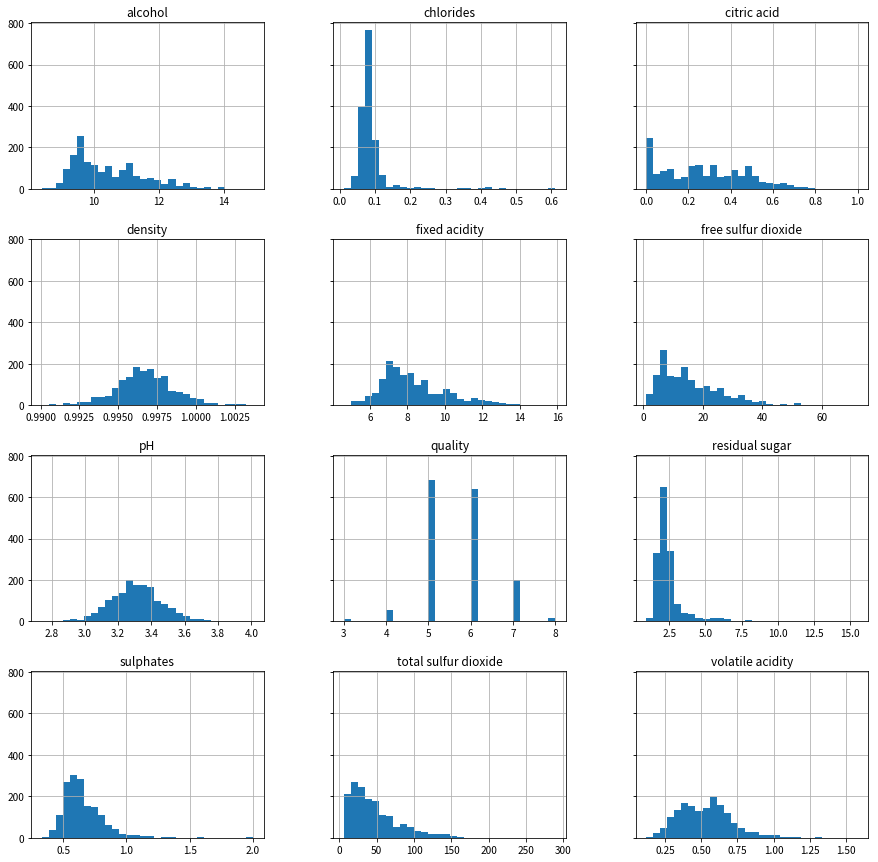

In [5]:
hist = wine.hist(bins=30, sharey=True, figsize=(15, 15))

In [6]:
wine.corr().style.background_gradient(cmap='RdYlGn')

In [7]:
wine.corr().loc['quality'].apply(np.abs).sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

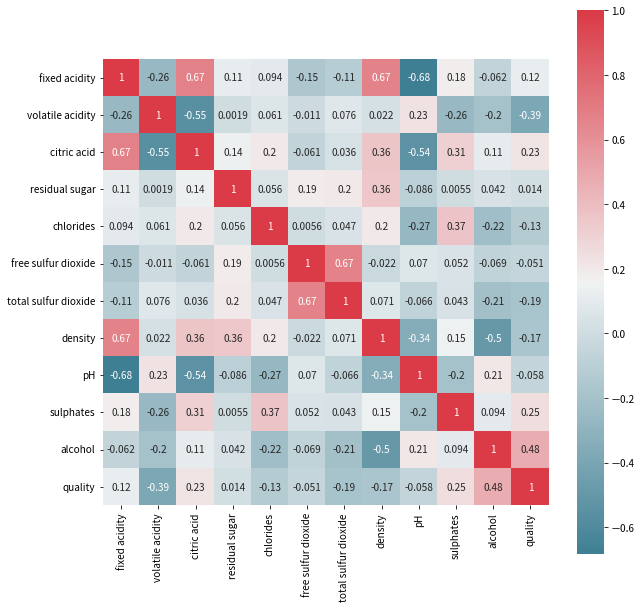

In [8]:
#要注意seaborn與numpy版本的相容性
#$ pip install --upgrade numpy --user
#$ pip install --upgrade seaborn --user
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(), mask=np.zeros_like(wine.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True,annot=True)
plt.show()

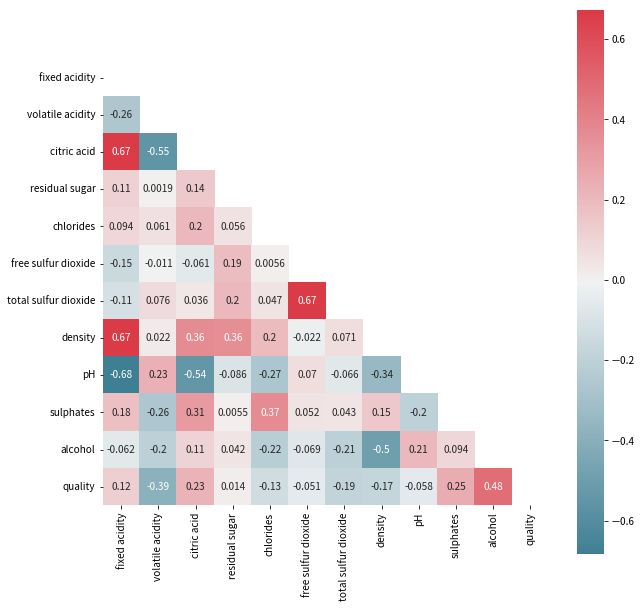

In [9]:
mask=np.zeros_like(wine.corr(), dtype=np.bool)

#將上半部設為空白
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(), mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True,annot=True)
plt.show()

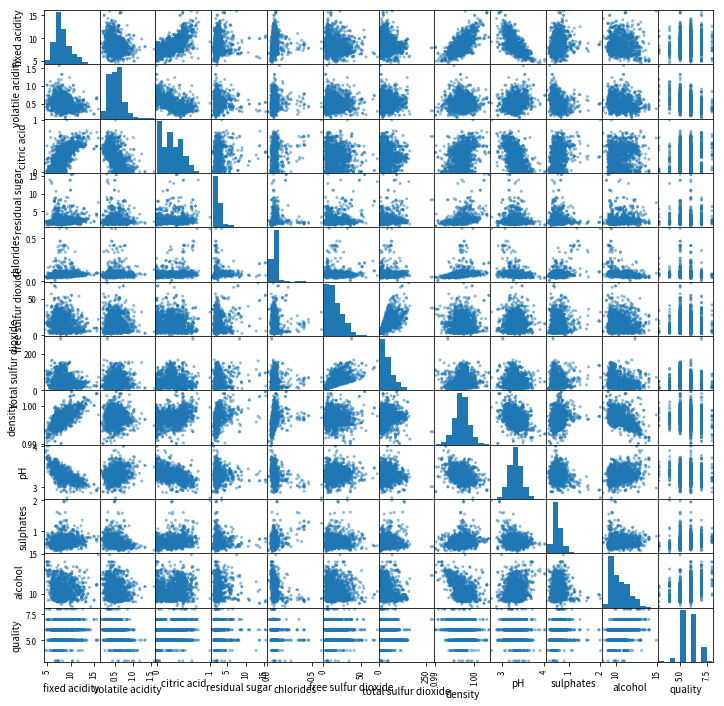

In [10]:
pd.plotting.scatter_matrix(wine, figsize=(12, 12))
plt.show()

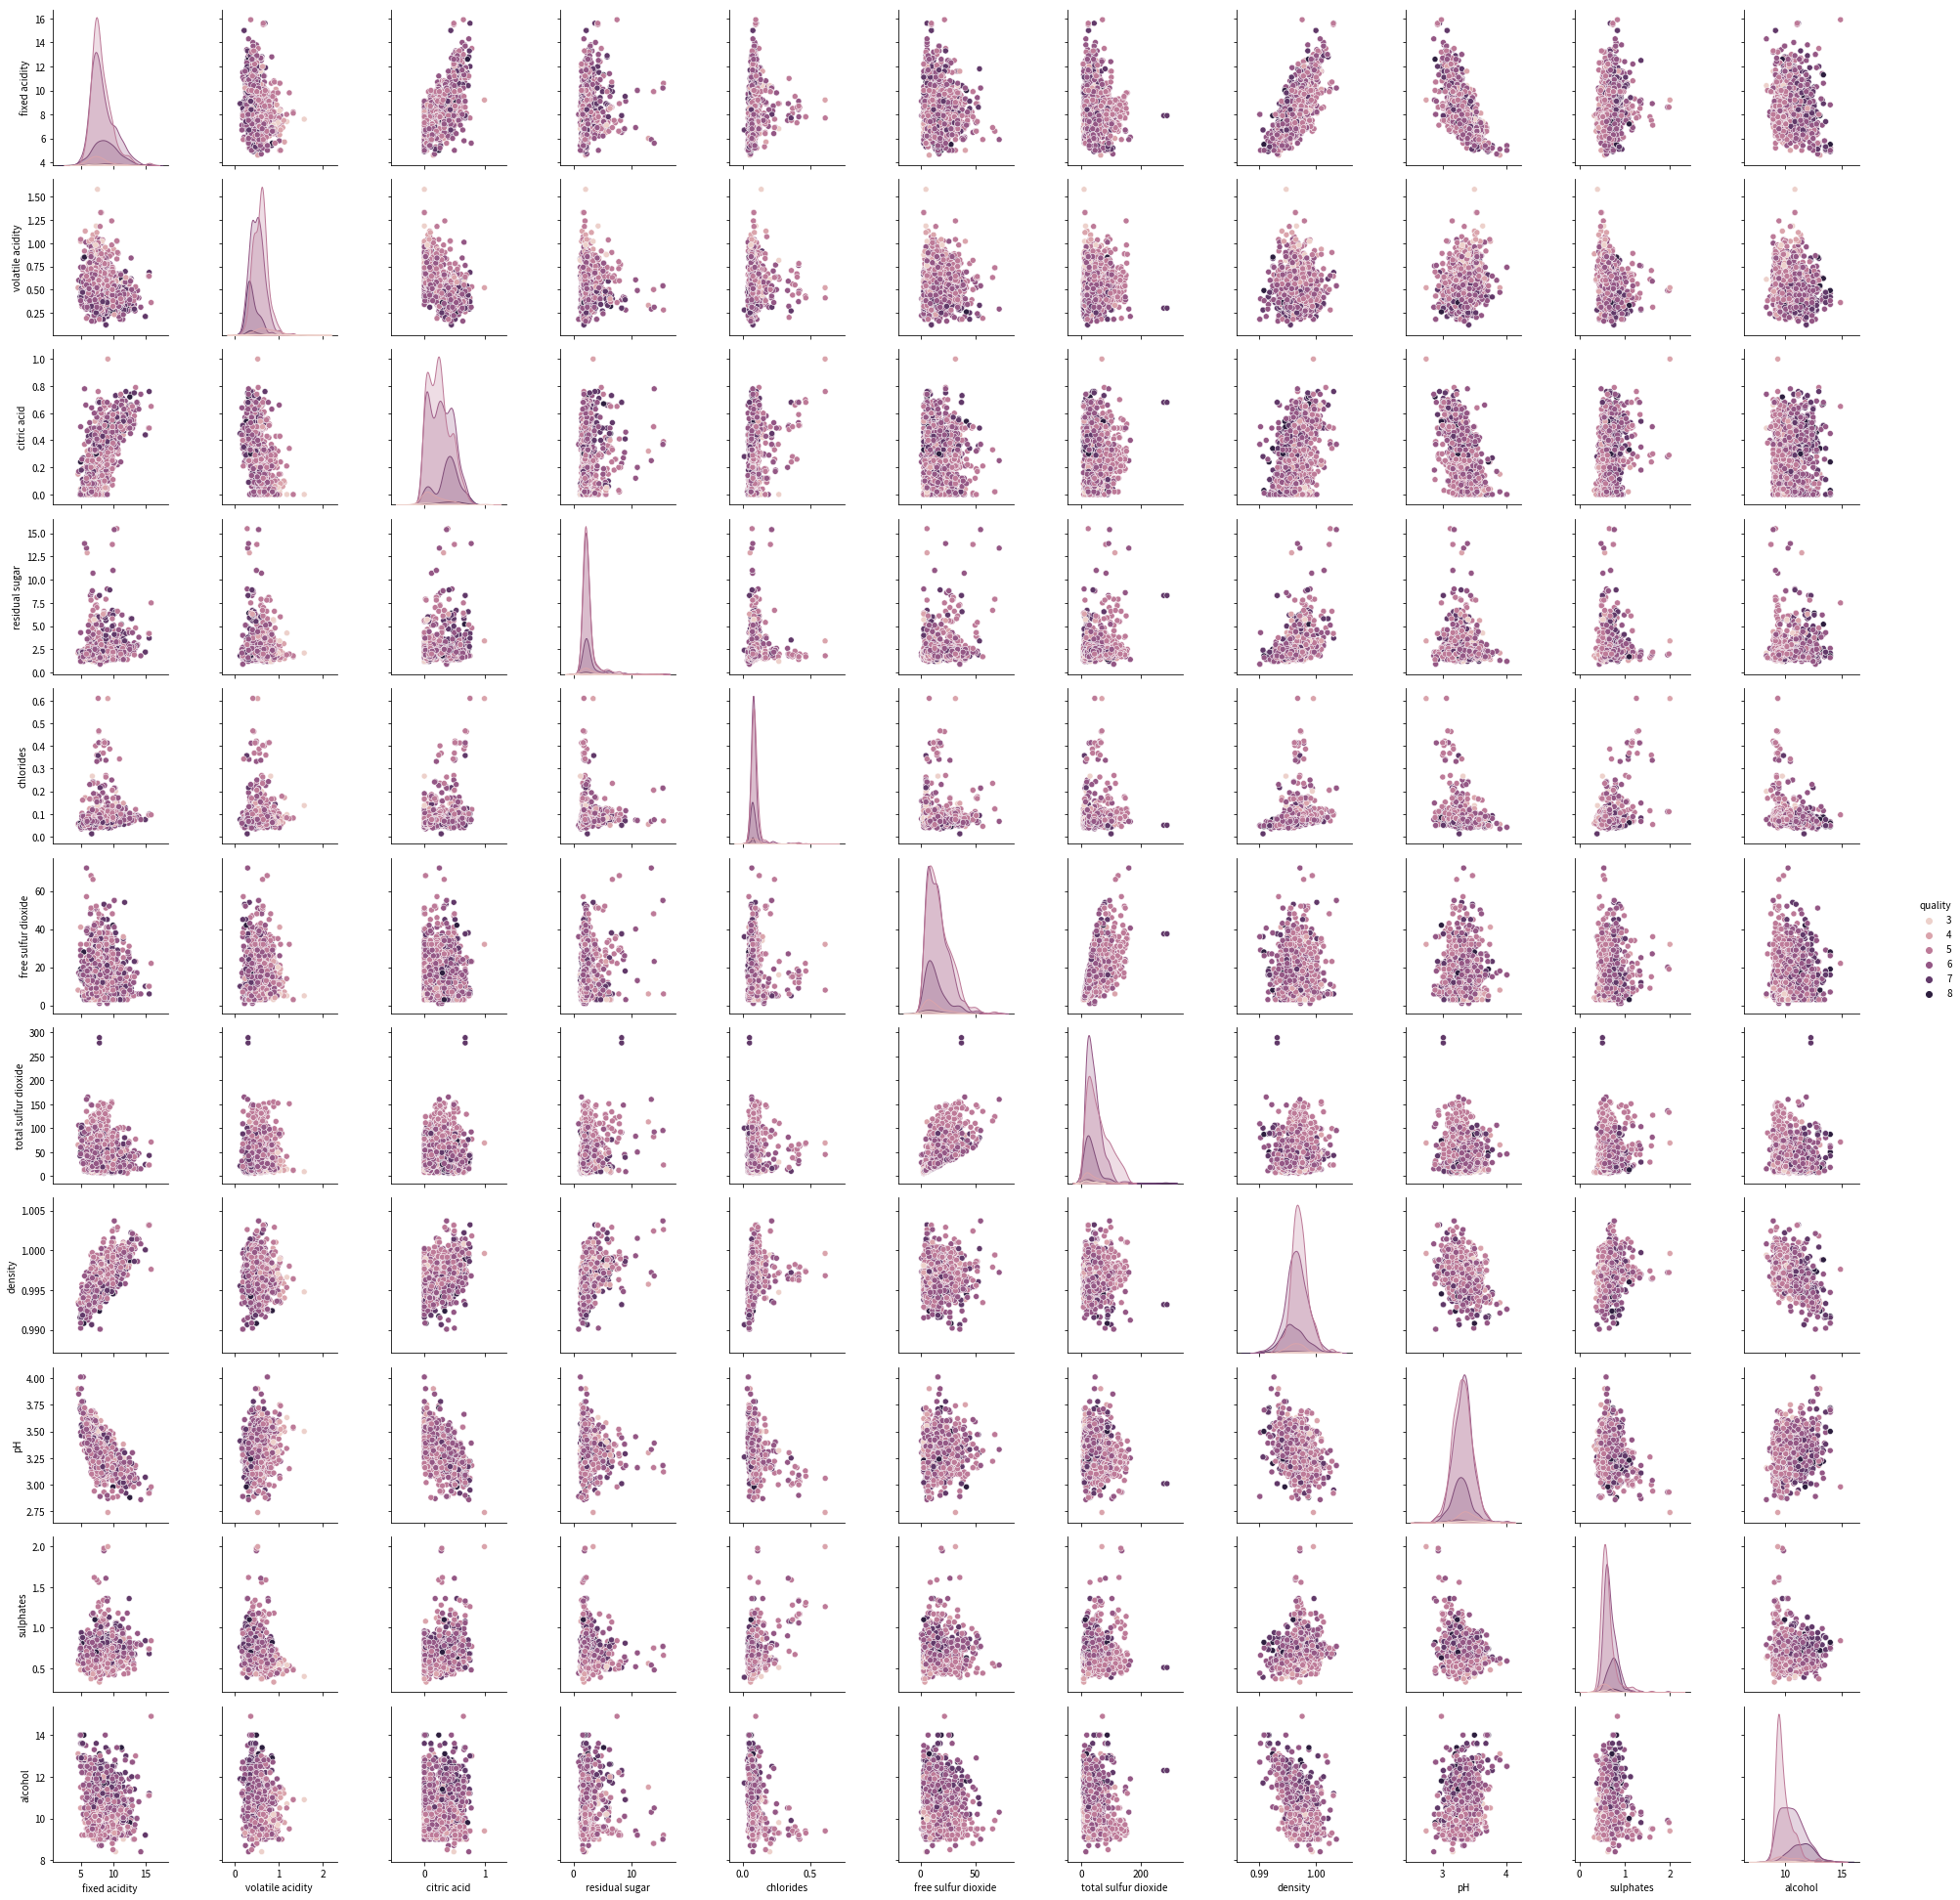

In [11]:
sns.pairplot(wine.dropna(), hue='quality') 

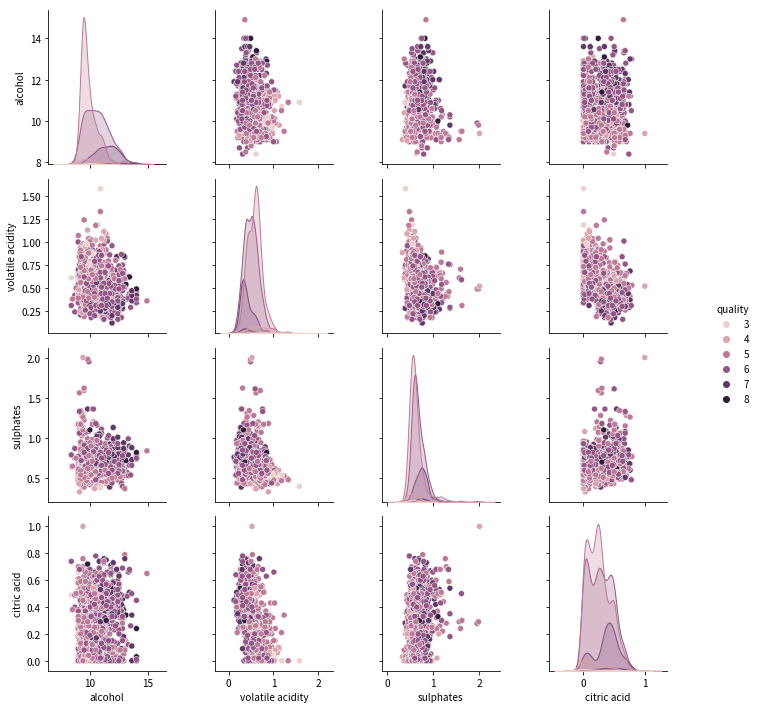

In [12]:
sns.pairplot(wine[['alcohol','volatile acidity','sulphates','citric acid','quality']].dropna(), hue='quality') 

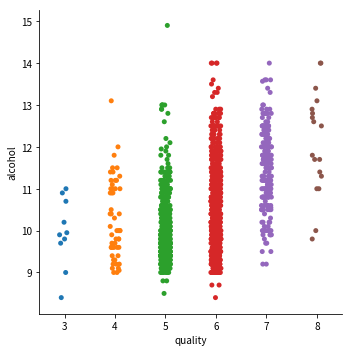

In [13]:
sns.catplot(data=wine, x="quality", y="alcohol")

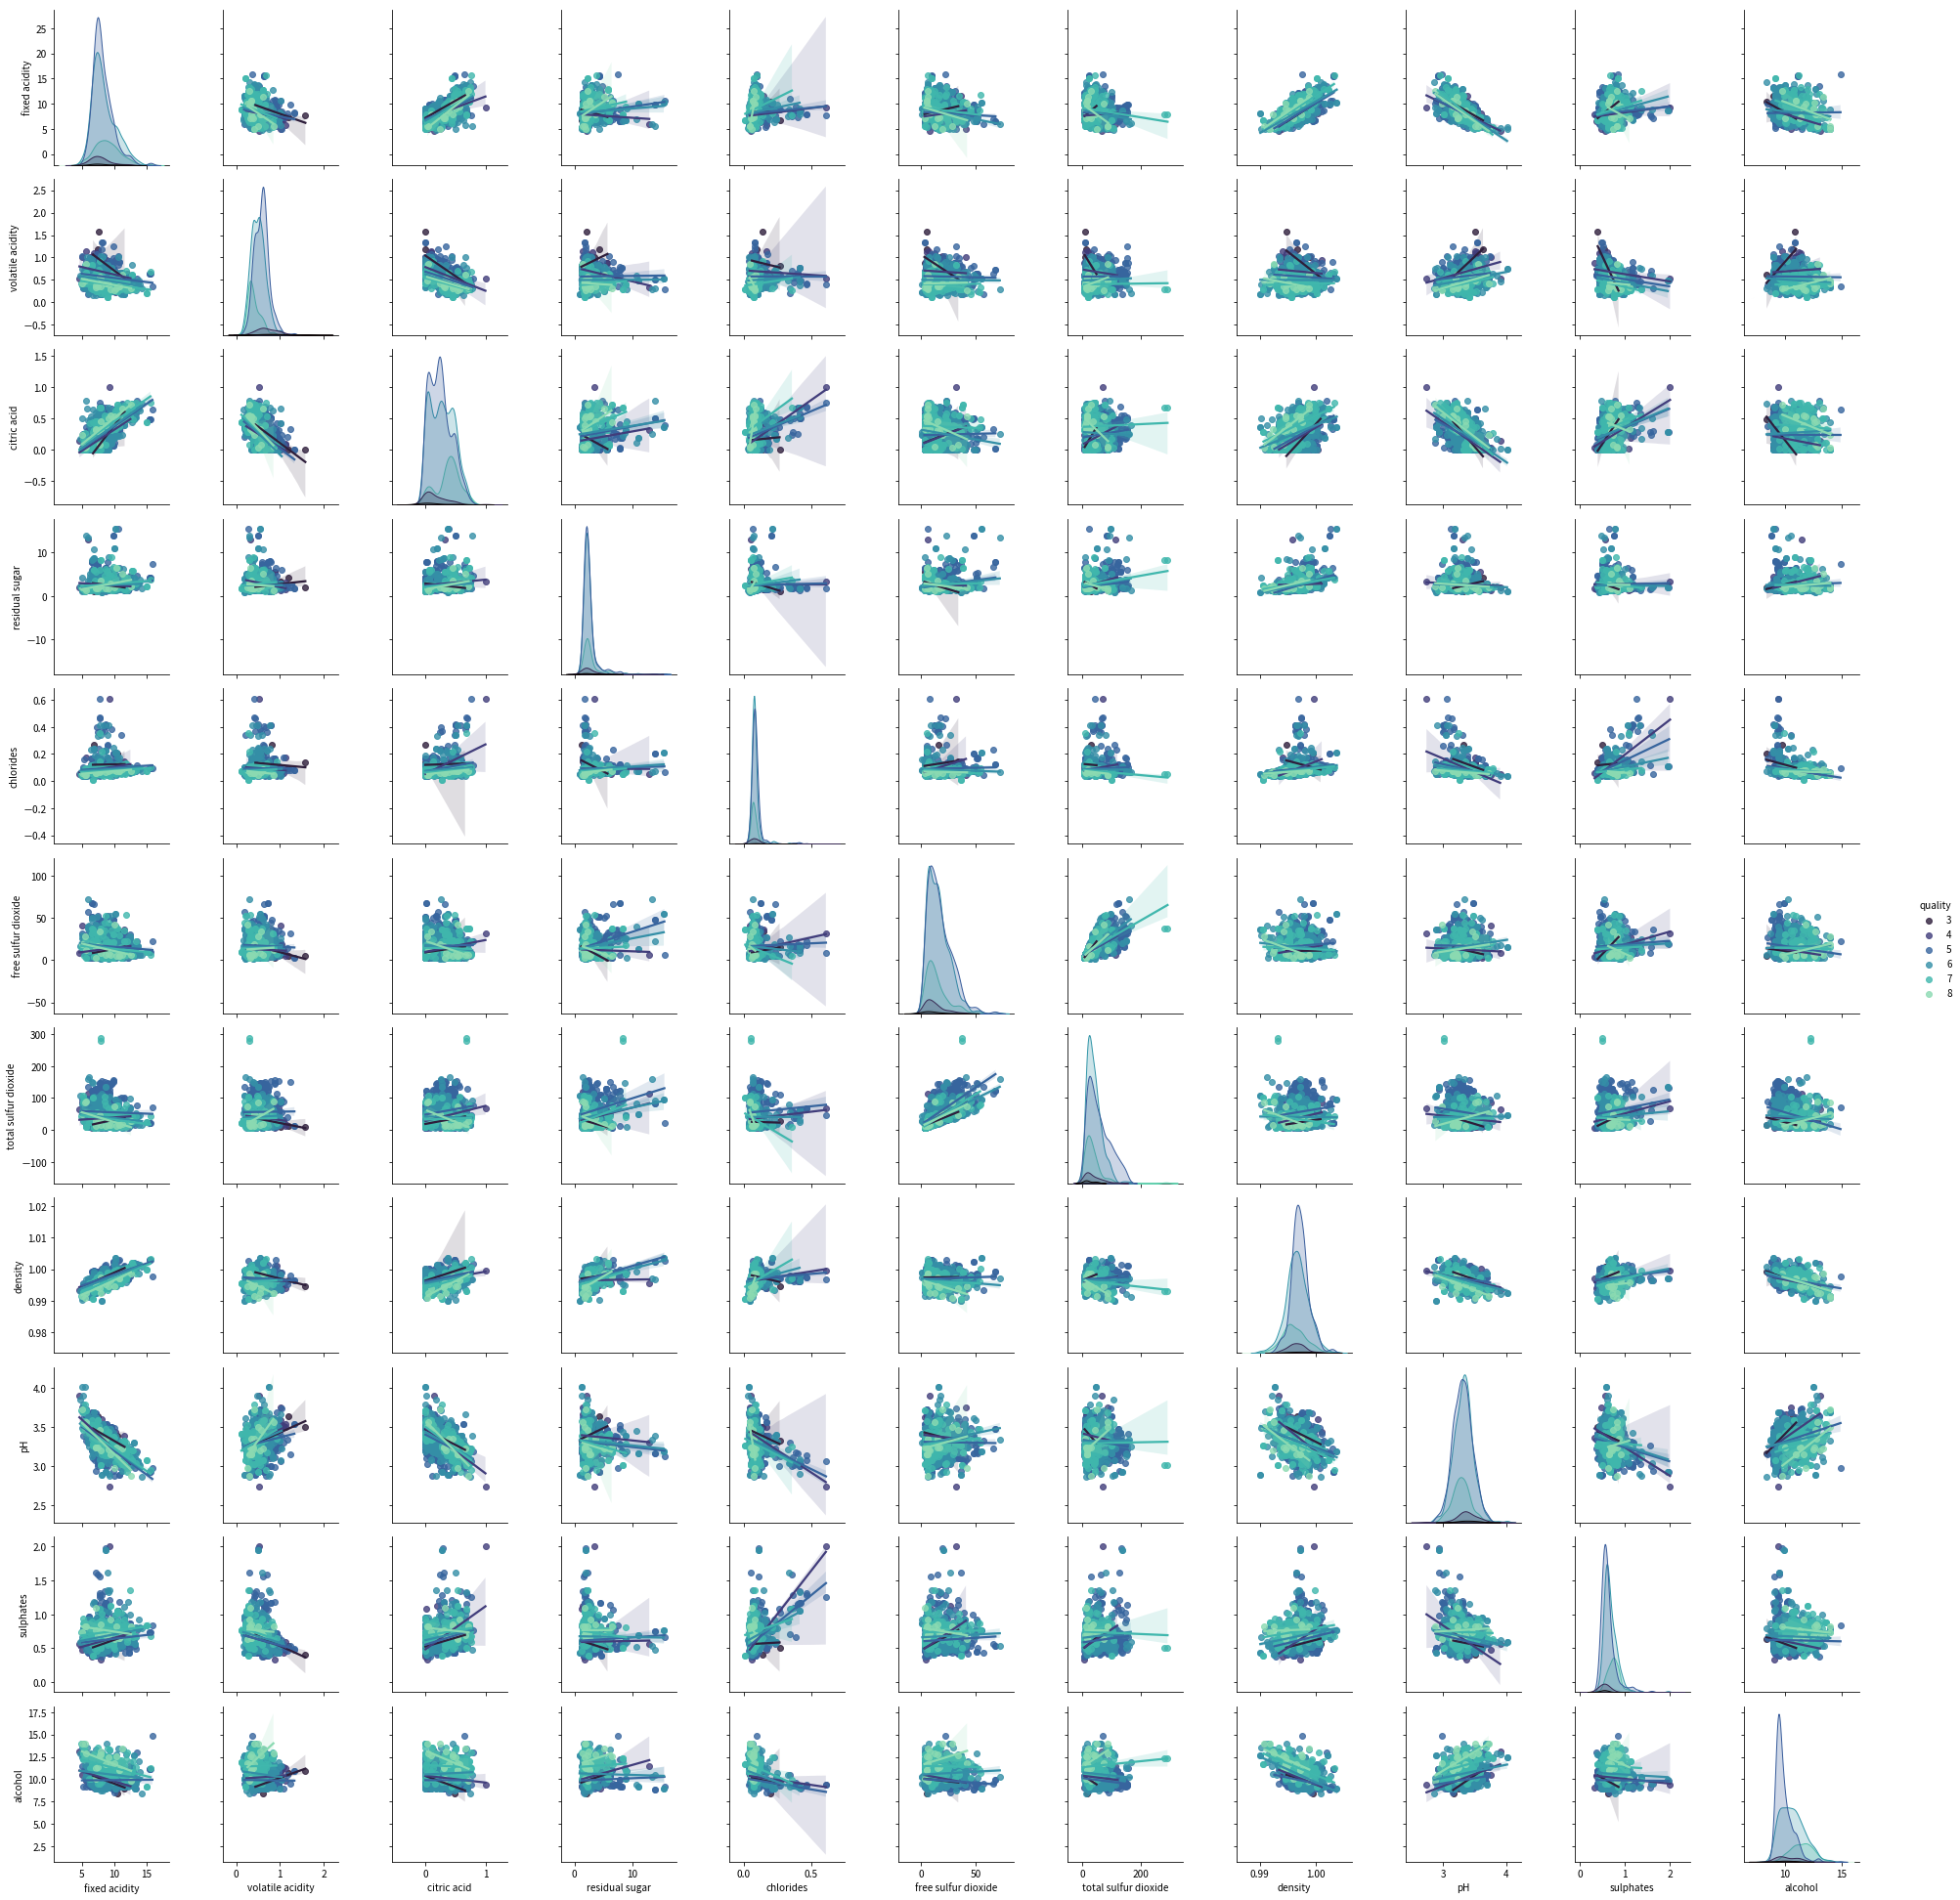

In [14]:
sns.pairplot(wine
             ,vars = wine.drop('quality',axis=1).columns
             ,kind="reg" 
             ,diag_kind="kde"
             ,hue="quality" 
             ,palette='mako',
            )

In [15]:
 wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [16]:
X = wine.drop('quality',axis=1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [17]:
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)
print("訓練準確度",xgbc.score(X_train,y_train),"測試準確度",xgbc.score(X_test,y_test))

[14:54:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
訓練準確度 1.0 測試準確度 0.65


In [18]:
xgbc.predict(X_test)

array([5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6,
       5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 4, 4, 6, 5, 7, 6, 6, 6, 5, 5,
       5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 7, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 7, 6, 7, 5, 6, 7, 6,
       5, 6, 7, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 7, 5, 5, 7, 5, 5, 6, 6, 6,
       5, 6, 5, 5, 6, 6, 5, 6, 7, 5, 6, 6, 6, 7, 5, 5, 5, 5, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 6, 5, 6, 4, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 5, 6, 6, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5,
       6, 6, 6, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 7, 6, 5, 5, 5, 5, 5,
       7, 7, 5, 5, 6, 5, 6, 7, 6, 7, 5, 7, 5, 5, 7, 5, 5, 6, 6, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 4, 7, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 7, 5, 7,
       7, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6,
       6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6,

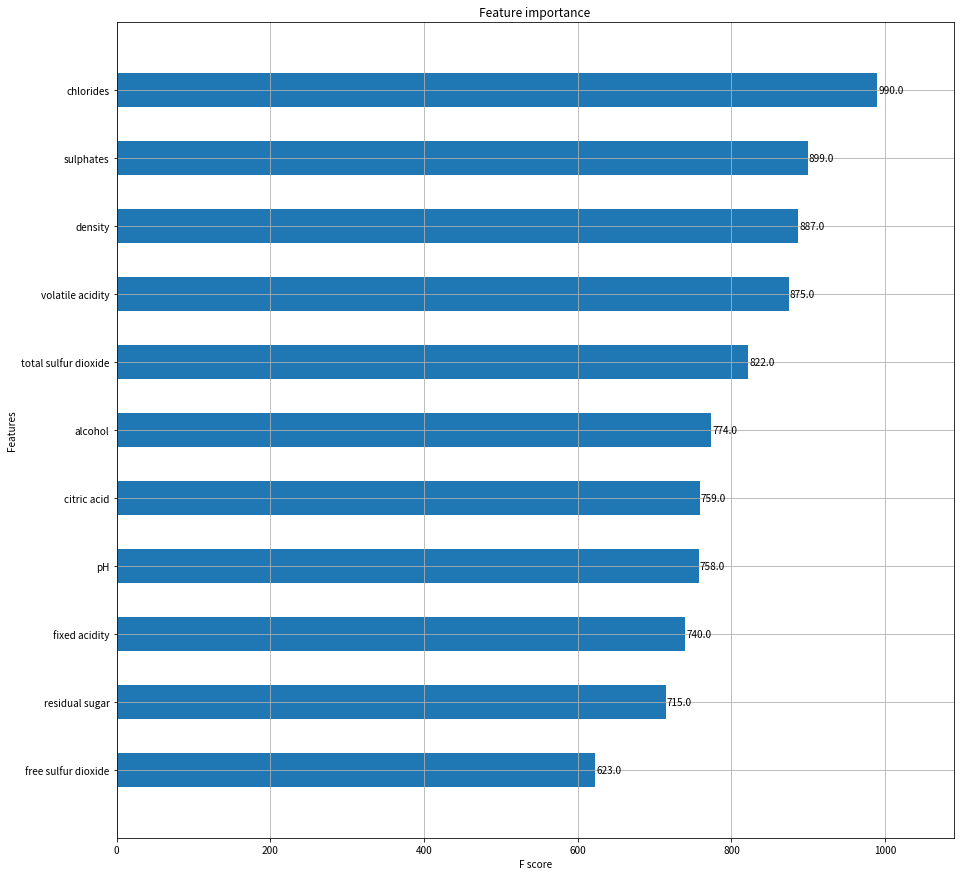

In [19]:
from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgbc,
                height=0.5,
                ax=ax,
                max_num_features=64)
plt.show()

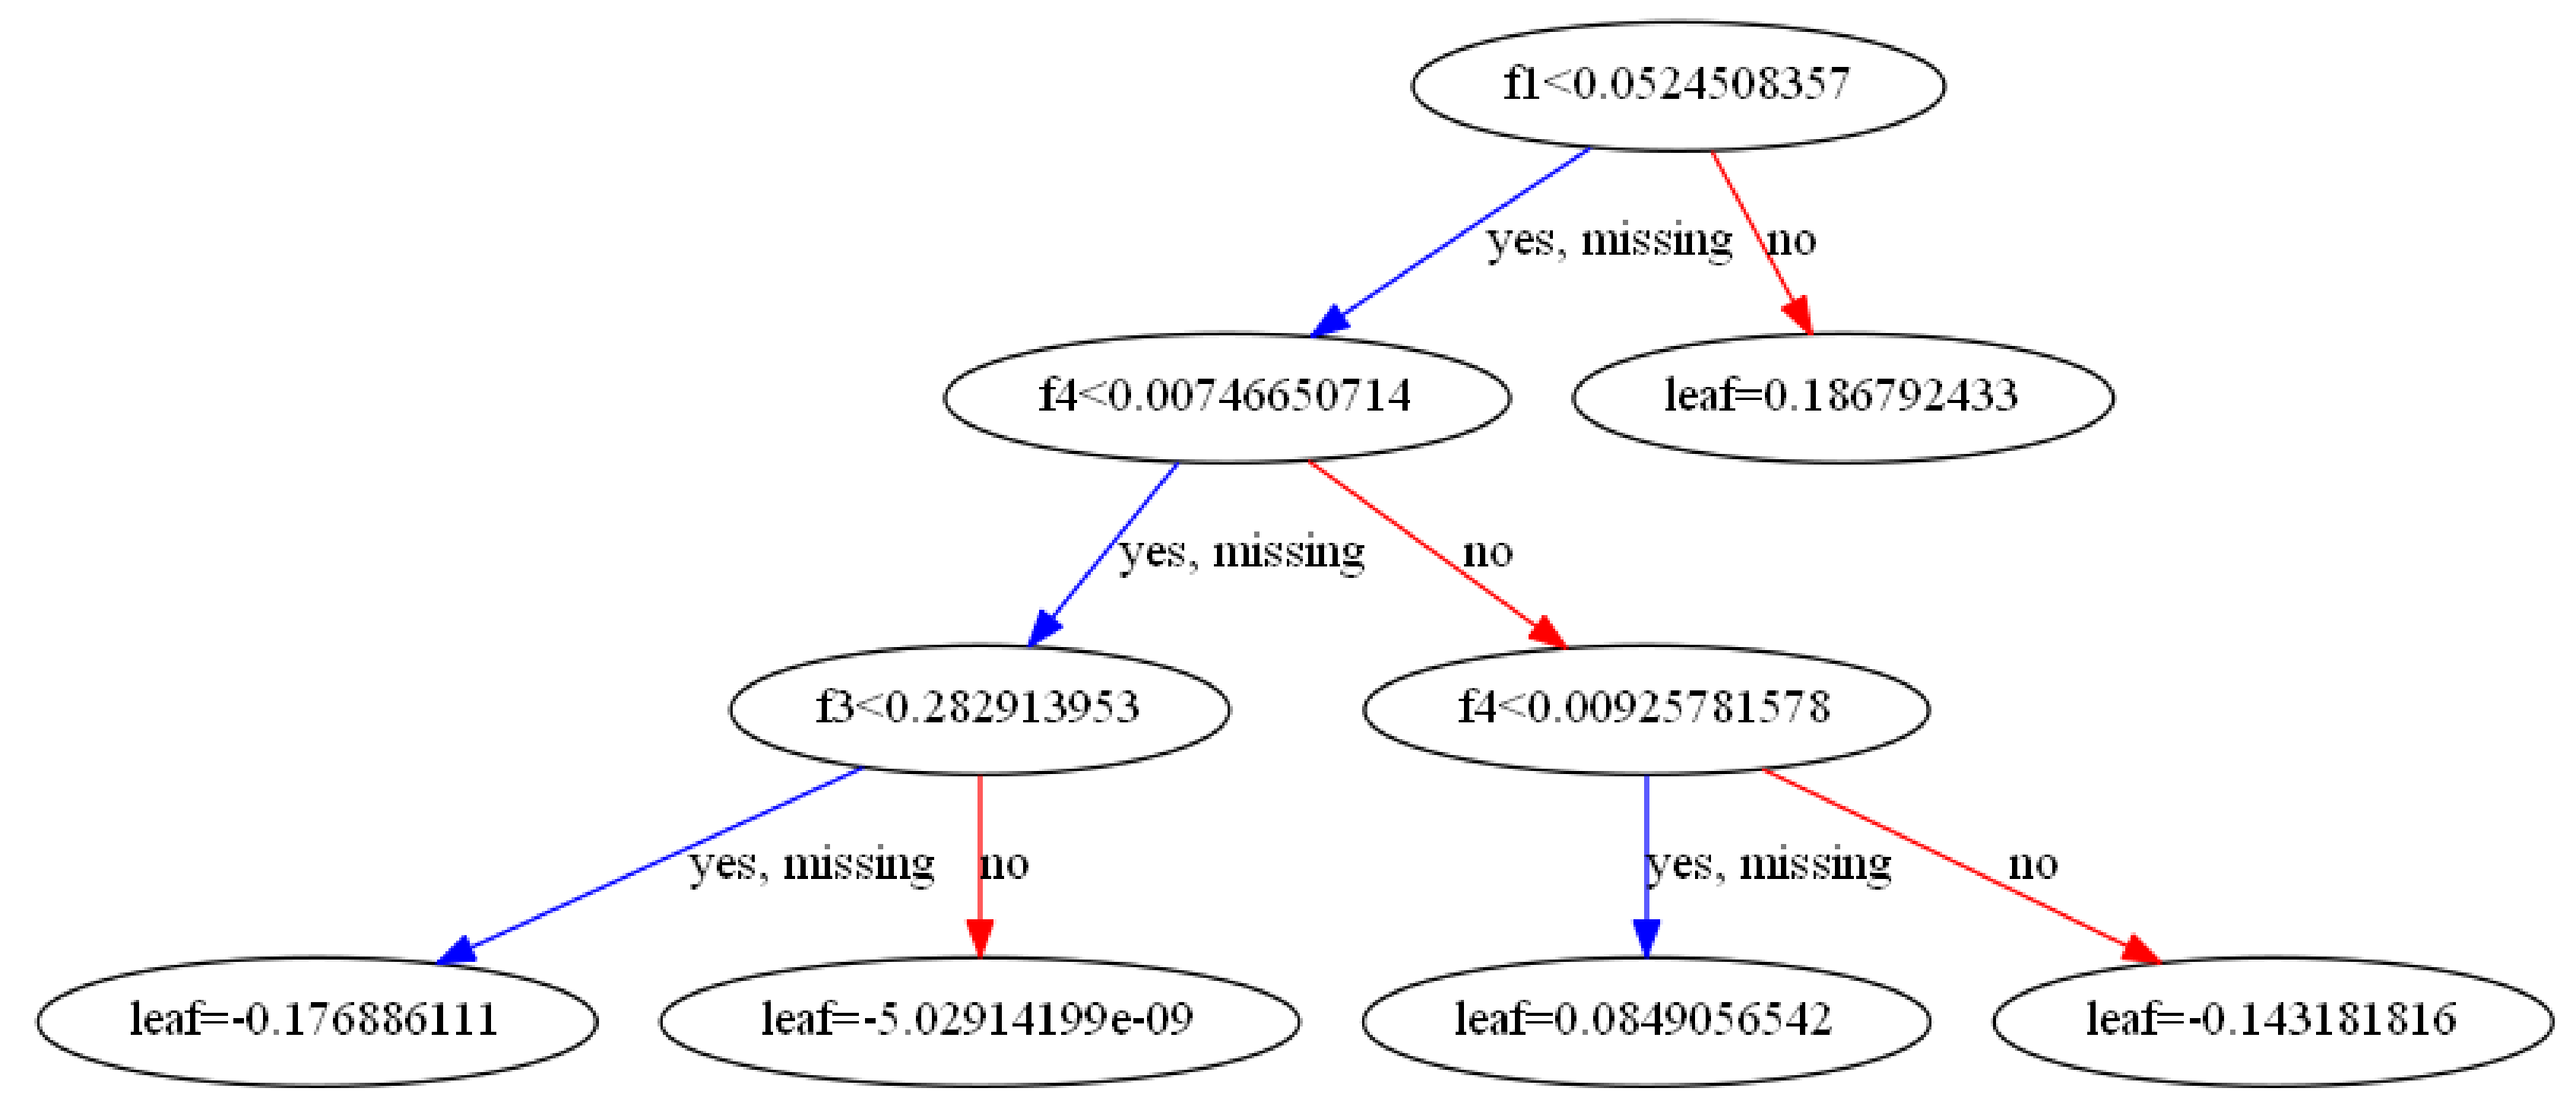

In [35]:
#請注意xgboost版本,太舊版本沒有支援plot_tree
#請注意要安裝graphviz模組, $ pip install --upgrade graphvize --user
from xgboost import plot_tree
fig,ax = plt.subplots()
fig.set_size_inches(60,30)
plot_tree(xgbc,ax=ax,num_trees=0)
plt.show()

In [21]:
xgbc_linear = XGBClassifier(booster='gblinear')
xgbc_linear.fit(X_train,y_train)
xgbc_linear.score(X_test,y_test)
print("訓練準確度",xgbc_linear.score(X_train,y_train),"測試準確度",xgbc_linear.score(X_test,y_test))

[14:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
訓練準確度 0.5801407349491791 測試準確度 0.546875


In [22]:
xgbc_dart = XGBClassifier(booster='dart',subsample=0.5,max_depth=10, learning_rate=0.1, n_estimators=100, num_class=6,eval_metric='mlogloss',objective='multi:softmax')
xgbc_dart.fit(X_train,y_train)
print("訓練準確度",xgbc_dart.score(X_train,y_train),"測試準確度",xgbc_dart.score(X_test,y_test))

訓練準確度 0.9992181391712275 測試準確度 0.628125


In [23]:
xgbc = XGBClassifier(booster='gbtree',subsample=0.5,max_depth=10, learning_rate=0.1, n_estimators=100, num_class=6,eval_metric='mlogloss',objective='multi:softmax')
xgbc.fit(X_train,y_train)
print("訓練準確度",xgbc.score(X_train,y_train),"測試準確度",xgbc.score(X_test,y_test))

訓練準確度 0.9992181391712275 測試準確度 0.675


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

In [25]:
wine = pd.read_csv("winequality-red.csv",sep=";",encoding="utf-8")
X = wine.drop('quality',axis=1)
y = wine['quality']

Xs = StandardScaler().fit_transform(X)
Xn = Normalizer().fit_transform(X)
Xm = MinMaxScaler().fit_transform(X)
Xs_train,Xs_test,ys_train,ys_test = train_test_split(Xs,y,test_size=0.2)
Xn_train,Xn_test,yn_train,yn_test = train_test_split(Xn,y,test_size=0.2)
Xm_train,Xm_test,ym_train,ym_test = train_test_split(Xn,y,test_size=0.2)

In [26]:
xgbc = XGBClassifier()
xgbc.fit(Xs_train,ys_train)
print("訓練準確度",xgbc.score(Xs_train,ys_train),"測試準確度",xgbc.score(Xs_test,ys_test))

[14:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
訓練準確度 1.0 測試準確度 0.7


In [27]:
xgbc = XGBClassifier()
xgbc.fit(Xn_train,yn_train)
print("訓練準確度",xgbc.score(Xn_train,yn_train),"測試準確度",xgbc.score(Xn_test,yn_test))

[14:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
訓練準確度 1.0 測試準確度 0.64375


In [28]:
xgbc = XGBClassifier()
xgbc.fit(Xm_train,ym_train)
print("訓練準確度",xgbc.score(Xm_train,ym_train),"測試準確度",xgbc.score(Xm_test,ym_test))

[14:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
訓練準確度 1.0 測試準確度 0.69375
